### Making a Lorentzian from a rotating gun

In this notebook we will see how a transformation from angular to linear co-ordinates turns a uniform distribution into a Cauchy or Lorentzian distribution. We will use the example of a rotating gun firing bullets at a distant wall, at a uniform rate. First we simulate a Poisson process in time, in the same manner we did in [Poisson Process notebook](6-poisson-process.ipynb). Given the gun rotation rate we can turn each time into an angle; and given the distance of the wall. The geometry is like this:

<figure style="text-align: center">
<br>
  <img src="6-rot-gun.jpg" alt="hmm" width="400">
<br>
 <figcaption>
     <b>Fig 1:</b> <em>Geometry of rotating gun problem.</em>
</figcaption>
</figure>


First, the usual setup:

In [1]:
from math import *
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

Now set up the parameters and initialise:

In [2]:
#################
# edit these parameters to play with the notebook
delt=0.01  # time step
p=0.02 # prob per time step
nhits=100 # keep going until we get nhits
d=2.5 # distance to wall (see diagram)
w=0.5 # rotation rate of gun, radians per unit time
##################
# now do rest of setup
lamda=p/delt # event rate per unit time
tstart=0.0
thetastart=0.0 # angle at tstart (see diagram)
times=np.zeros(nhits)  # the list of times at which we get an event
theta=np.zeros(nhits) # the angles these times correspond to
x=np.zeros(nhits) # the x-distances along the wall these times correspond to.

As we did in the [Poisson Process notebook](poisson-process.ipynb) we will loop round time, run a Bernoulli test at each time, and only add to the *times* array when we get a 1, i.e. a bullet fires. In the same loop, for each event, we will transform to $\theta$ and then also to the distance along the wall, $x$. Note that strictly speaking we should only include the forward moving bullets. However, because of the symmmetry of $\tan\theta$, ignoring this just doubles the number of recorded events.

In [3]:
n=0 # hit counter
t=tstart # start time

# increment t in a loop
# only record succesful events
while n<nhits:
    r=ss.bernoulli.rvs(p,size=1) # outputs an array one element long
    test=r[0]
    if test==1:
        times[n]=t
        theta[n]=thetastart+ (w*times[n])%(2.*pi)  # note use of modulo operator
        x[n]=d*tan(theta[n])
        n=n+1

    t=t+delt

#### Sequence of events in angle

Plot the events in $\theta$ on a line. We can set a range of event numbers from efirst to elast, so we can look at a few at a time if we look.

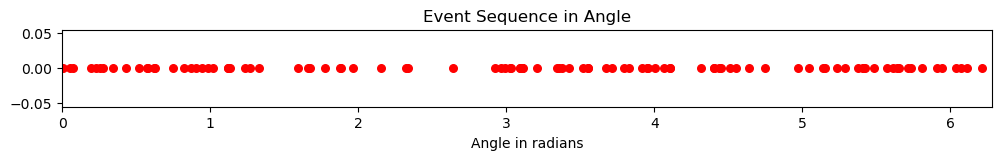

In [4]:
efirst=0  # first event number to plot
elast=nhits  # last event to plot
thslice=theta[efirst:elast] # slice to plot
yvals=np.zeros(len(thslice)) # dummy array of y-values

fig, ax = plt.subplots(figsize=(12, 1))
ax.set_title("Event Sequence in Angle")
ax.set_xlabel("Angle in radians")
ax.set_xlim(0, 2 * pi)

# Plot events using Matplotlib
ax.scatter(thslice, yvals, color="red", s=30)

# Show the Matplotlib plot
plt.show()

For a small range of efirst to elast, you can see that we have a Poisson process, randomly distributed along the line. As you make the range bigger, and the bullet angles are wrapping round, it becomes clear that the distribution is uniform,

#### Sequence of events in $x$

Next we can try plotting the same at their $x$-positions. Of course the bullets can arrive at an indefinitely large $x$-position, if they get launched at an angle close to 180$^\circ$, so we need to cut off at an arbitrarily chosen distance.  We see that around $x=0$ is more likely.

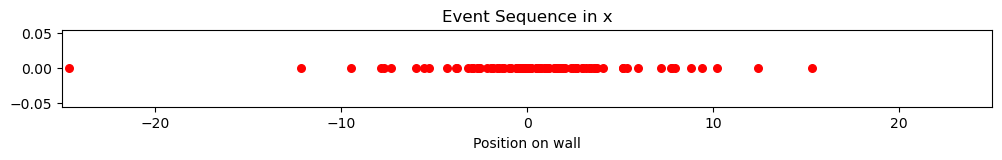

In [5]:
xmax=10.0*d
xslice=x[efirst:elast] # slice to plot


fig, ax = plt.subplots(figsize=(12, 1))
ax.set_title("Event Sequence in x")
ax.set_xlabel("Position on wall")
ax.set_xlim(-xmax, +xmax)

# Plot events using Matplotlib
ax.scatter(xslice, yvals, color="red", s=30)

# Show the Matplotlib plot
plt.show()

Its immediately obvious that the distribution is peaked at $x=0$.

##### Distribution in $x$

Now we can make a histogram of how many events in a given range of $x$

In [6]:
nbins=30 # number of bins in histogram

# note we are using density=True to get probability density
# also manually set the lower and upper range of the histogram
# default of np.histogram is to use observed min and max values of x
# but a single accidentally large value can give silly binning

hist,edges=np.histogram(x,nbins, range=(-xmax, xmax), density=True) 
# get bin centres from the bin edges
bincens=np.zeros(nbins)
for i in range(0,nbins):
    bincens[i]=edges[i]+(edges[i+1]-edges[i])/2.0
    

#### Comparison to theoretical Lorentzian distribution

According to the theory we went through in the lecture we should have 

$$ p(x) = \frac{1}{\pi} \frac{d}{d^2+x^2} $$

So first lets make the theoretical curve, using the same $\pm x_{max}$

In [7]:
deltplot=0.01  # grid step for making curve
xcurve=np.arange(-xmax,xmax,deltplot)
ycurve=np.zeros(len(xcurve))
for i in range(0,len(xcurve)):
    ycurve[i]=(1/pi)*(d/(d**2+xcurve[i]**2))


Finally, compare the simulated distribution and the theoretical curve.

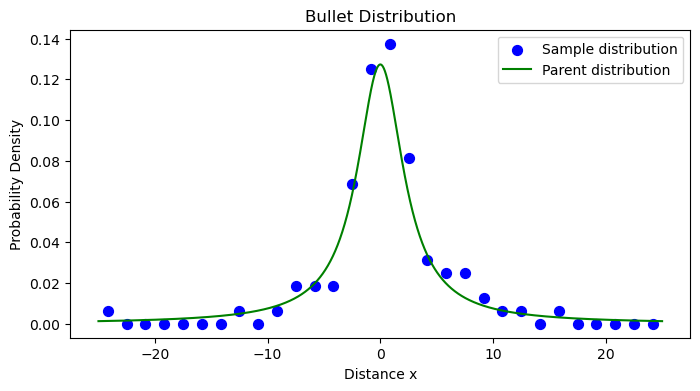

In [8]:

# Create Matplotlib figure and axis
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title("Bullet Distribution")
ax.set_xlabel("Distance x")
ax.set_ylabel("Probability Density")

# Plot bullet distribution using Matplotlib
ax.scatter(bincens, hist, color="blue", s=50, label='Sample distribution')
# ax.plot(bincens, hist, color='red', label='Line')

# Assuming xcurve and ycurve are the curve data
ax.plot(xcurve, ycurve, color='green', label='Parent distribution')

# Show legend
ax.legend()

# Show the Matplotlib plot
plt.show()

#### Explore

Try playing with $n_{hits}$ to see how close the simulation is.

What is the FWHM? How does it depend on $d$ ?